<a href="https://colab.research.google.com/github/Ronaldo-khagokpam/DEEP-LEARNING/blob/main/phee_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Create 3a folders called Images, sample
# 2. Inside Images folder, create 5 sub folders called
# leirumphee, phigephanek, raniphee, thamballeikhok, wangkheiphee
# 3. Upload the relavent images inside 5 subfolders
# 4. Upload some unseen images inside sample folder for testing
!unzip Phees.zip
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


#Fetch Images count from Fodlers
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

#Load Images into Arrays as Dataset
base_dir = 'Images/'
img_size = 180
batch = 32
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

phee_names = train_ds.class_names
phee_names

import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(phee_names[labels[i]])
        plt.axis('off')
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

#Model Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + phee_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

classify_images('Sample/rani129.jpeg')

#model.save('Phee_Recog_Model.h5')

model.save('Phee_Recog_Model.keras')



Archive:  Phees.zip
   creating: Phees/
   creating: Phees/test/
   creating: Phees/test/khudei/
  inflating: Phees/test/khudei/khudei1.jpg  
  inflating: Phees/test/khudei/khudei10.jpg  
  inflating: Phees/test/khudei/khudei12.jpg  
  inflating: Phees/test/khudei/khudei3.jpg  
  inflating: Phees/test/khudei/khudei5.jpg  
  inflating: Phees/test/khudei/khudei9.jpg  
   creating: Phees/test/kokyet/
  inflating: Phees/test/kokyet/kokyet1.jpg  
  inflating: Phees/test/kokyet/kokyet2.jpg  
  inflating: Phees/test/kokyet/kokyet3.jpg  
  inflating: Phees/test/kokyet/kokyet4.jpg  
  inflating: Phees/test/kokyet/kokyet5.jpg  
   creating: Phees/test/leirumphee/
  inflating: Phees/test/leirumphee/l1.jpeg  
  inflating: Phees/test/leirumphee/L2.jpg  
  inflating: Phees/test/leirumphee/l20.jpeg  
  inflating: Phees/test/leirumphee/l25.jpg  
  inflating: Phees/test/leirumphee/l37.jpg  
  inflating: Phees/test/leirumphee/l38.jpg  
  inflating: Phees/test/leirumphee/L5.jpg  
  inflating: Phees/test/

FileNotFoundError: [Errno 2] No such file or directory: 'Images/'

In [ ]:
classify_images('Sample/rani129.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'The Image belongs to raniphee with a score of 99.998566'

In [ ]:

def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + phee_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [ ]:
#Model Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.2578 - loss: 1.5438 - val_accuracy: 0.5600 - val_loss: 1.2890
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4988 - loss: 1.2739 - val_accuracy: 0.3200 - val_loss: 1.4250
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4610 - loss: 1.2659 - val_accuracy: 0.5200 - val_loss: 1.1452
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5672 - loss: 1.1039 - val_accuracy: 0.3800 - val_loss: 1.3179
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6270 - loss: 0.9619 - val_accuracy: 0.4000 - val_loss: 1.5613
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7247 - loss: 0.8281 - val_accuracy: 0.5400 - val_loss: 1.1417
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6971 - loss: 0.7683 - val_accuracy: 0.5800 - val_loss: 1.0701
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7521 - loss: 0.6178 - val_accuracy: 0.6400 - val_loss: 0.8119


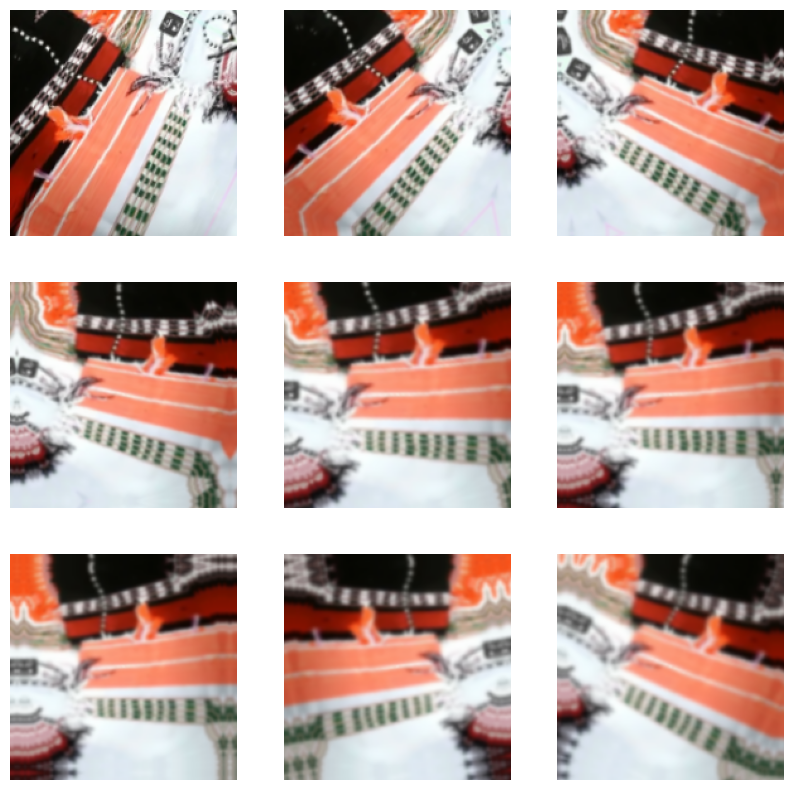

In [ ]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

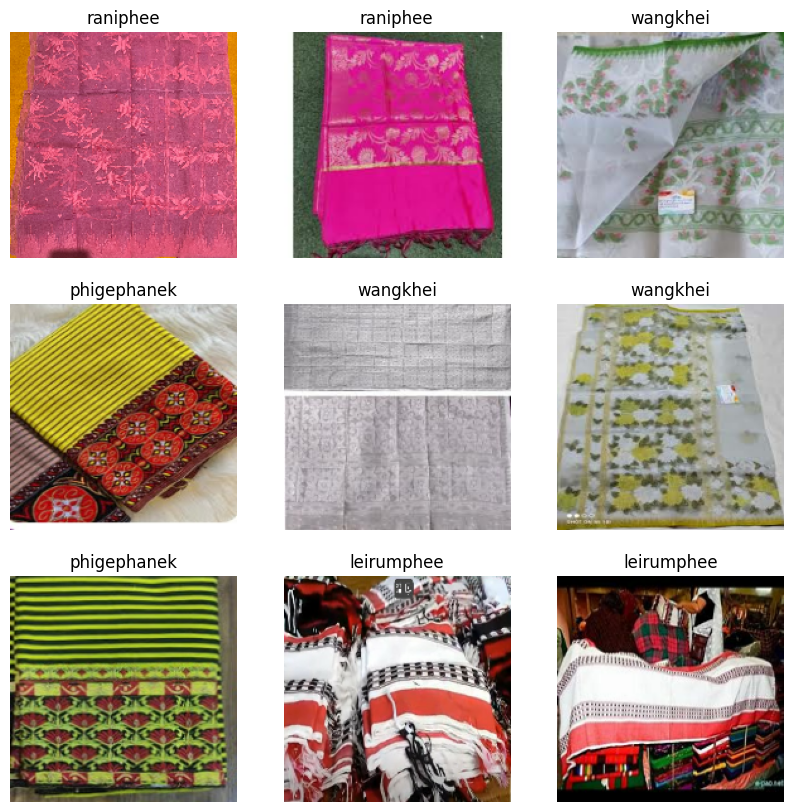

In [ ]:
import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(phee_names[labels[i]])
        plt.axis('off')
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)


In [ ]:
#Load Images into Arrays as Dataset
base_dir = 'Images/'
img_size = 180
batch = 32
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

phee_names = train_ds.class_names
phee_names


Found 251 files belonging to 5 classes.
Using 201 files for training.
Found 251 files belonging to 5 classes.
Using 50 files for validation.


['leirumphee', 'phigephanek', 'raniphee', 'thamballeikhok', 'wangkhei']

In [ ]:
#Fetch Images count from Fodlers
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

.ipynb_checkpoints Folder has 0 Images
wangkhei Folder has 31 Images
leirumphee Folder has 40 Images
thamballeikhok Folder has 17 Images
raniphee Folder has 130 Images
phigephanek Folder has 33 Images
Images Folder has 251 Images


In [ ]:
import seaborn as sns
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


Text(0.5, 1.0, 'Loss')

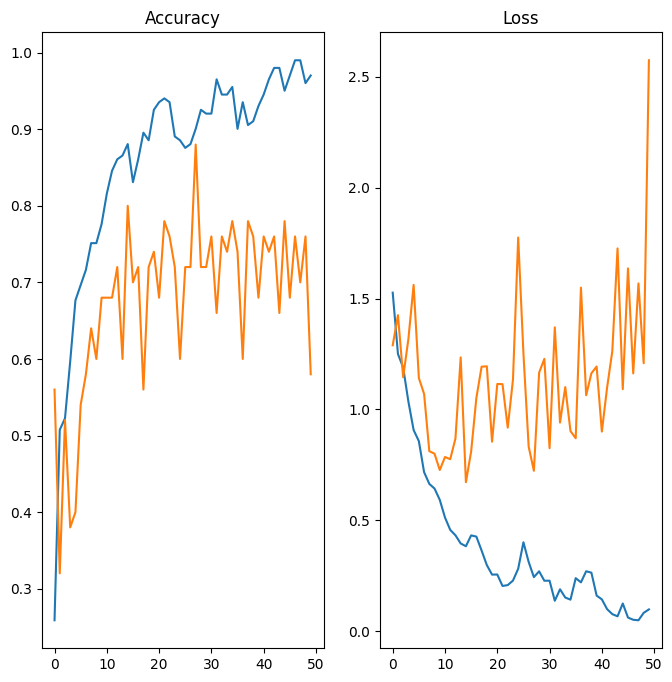

In [ ]:
# write these codes just after training model line
# history = model.fit(train_ds, epochs=15, validation_data=val_ds)
# Then Accuracy graphs and loss graph will be shown

epochs_range=range(50)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

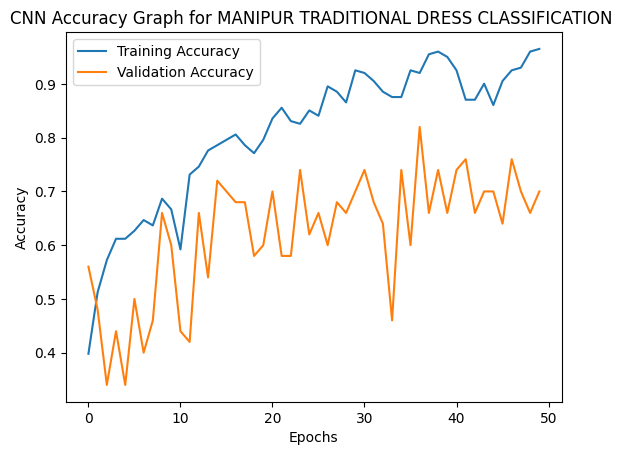

In [ ]:
import matplotlib.pyplot as plt

# Assume 'history' is the training history from model.fit()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy Graph for MANIPUR TRADITIONAL DRESS CLASSIFICATION ')
plt.show()


In [ ]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

In [ ]:
classify_images('Sample/rani86.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


'The Image belongs to raniphee with a score of 98.21306'

In [ ]:
phee_names

['leirumphee', 'phigephanek', 'raniphee', 'thamballeikhok', 'wangkheiphee']